# An Introduction to Neural Networks: From Scratch

### Questions/Improvements
- What's the backup plan if binder fails?
- Planning to use R, but could use Python? Especially if Brian's doesn't require any knowledge of programming, does it make sense to switch between the two?
- pandas seems to be better for visualising data frames, can we use it more throughout to provide intuition, and switch to using np.arrar() later?

In [7]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt

random.seed(1)

In [2]:
data = pd.read_csv('kaggle-MNIST-train.csv')

- m = number of rows (one row for each handwritten digits in the data set)
- n = number of columns (one column for each of the 784 pixels, and one column for the label)

In [20]:
data = np.array(data)
m, n = data.shape # Get dimensions of data frame 
np.random.shuffle(data) # Shuffles order of rows

# Split data into dev and training sets
data_dev = data[0:1000].T # Get first 1000 rows and transpose data frame
Y_dev = data_dev[0] # Labels (actual handwritten number) of each dev example
X_dev = data_dev[1:n] # Pixel values
X_dev = X_dev / 255. # Normalise (. used to ensure floating point arithmetic?)

data_train = data[1000:m].T # Remaining rows not used in dev are used to train
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape # Use m here because we transposed

In [71]:
# Randomly intialise parameters 
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    # Create a matrix full of zeros. Each row for each digit, each column for the 10 possible labels
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) 
    # For each row, set the column corresponding to the value of the handwritten digit equal to 1
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    # Need to brush up on the maths/how to explain this
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

# Explain that alpha is a hyperparameter
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
    

In [72]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [73]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[2 5 2 ... 2 2 2] [0 1 6 ... 4 1 0]
0.09958536585365854
Iteration:  10
[0 5 0 ... 2 3 7] [0 1 6 ... 4 1 0]
0.2044390243902439
Iteration:  20
[0 5 0 ... 3 3 7] [0 1 6 ... 4 1 0]
0.27126829268292685
Iteration:  30
[0 5 0 ... 3 8 7] [0 1 6 ... 4 1 0]
0.3218780487804878
Iteration:  40
[0 1 0 ... 3 1 7] [0 1 6 ... 4 1 0]
0.36641463414634146
Iteration:  50
[0 1 0 ... 3 1 7] [0 1 6 ... 4 1 0]
0.41221951219512193
Iteration:  60
[0 1 0 ... 3 1 7] [0 1 6 ... 4 1 0]
0.4549268292682927
Iteration:  70
[0 1 6 ... 3 1 7] [0 1 6 ... 4 1 0]
0.4899268292682927
Iteration:  80
[0 1 6 ... 3 1 7] [0 1 6 ... 4 1 0]
0.523219512195122
Iteration:  90
[0 1 6 ... 3 1 7] [0 1 6 ... 4 1 0]
0.5521951219512196
Iteration:  100
[0 1 6 ... 8 1 7] [0 1 6 ... 4 1 0]
0.5788048780487804
Iteration:  110
[0 1 6 ... 8 1 0] [0 1 6 ... 4 1 0]
0.603780487804878
Iteration:  120
[0 1 6 ... 8 1 0] [0 1 6 ... 4 1 0]
0.6258048780487805
Iteration:  130
[0 1 6 ... 8 1 0] [0 1 6 ... 4 1 0]
0.6459512195121951
Iteration:  140

In [74]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


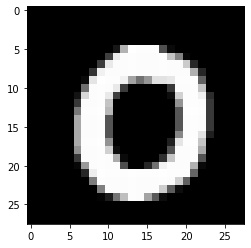

Prediction:  [1]
Label:  1


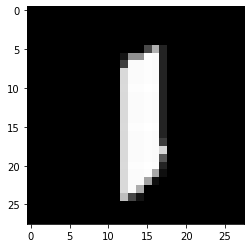

Prediction:  [6]
Label:  6


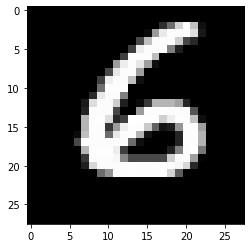

Prediction:  [8]
Label:  6


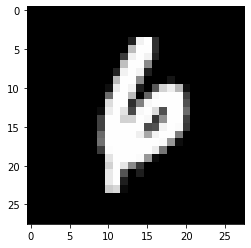

In [75]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)